In [640]:
cd /content/drive/MyDrive/AmExpert

/content/drive/MyDrive/AmExpert


In [641]:
#import zipfile
#with zipfile.ZipFile("/content/892bcbe6493411ec.zip",'r') as zip_ref:
  #zip_ref.extractall("/content/drive/MyDrive/AmExpert")


In [642]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [643]:
train=pd.read_csv("/content/drive/MyDrive/AmExpert/dataset/train.csv")

In [644]:
train.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [645]:
train.shape

(45528, 19)

In [646]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [647]:
train.describe()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
count,45528.000000,44754.000000,4.552800e+04,45065.000000,45445.000000,45441.000000,45433.000000,4.552800e+04,45528.00000,45520.000000,45528.000000,45528.000000,45528.000000
mean,38.993411,0.420655,2.006556e+05,67609.289293,2.158081,0.179111,31796.965311,4.354842e+04,52.23502,782.791257,0.060710,0.050540,0.081203
std,9.543990,0.724097,6.690740e+05,139323.524434,0.911572,0.383450,17269.727234,1.487847e+05,29.37691,100.619746,0.264629,0.219059,0.273149
min,23.000000,0.000000,2.717061e+04,2.000000,1.000000,0.000000,2237.470000,4.003140e+03,0.00000,500.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,1.263458e+05,936.000000,2.000000,0.000000,19231.140000,2.397381e+04,27.00000,704.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,1.717149e+05,2224.000000,2.000000,0.000000,29081.650000,3.568804e+04,54.00000,786.000000,0.000000,0.000000,0.000000
75%,47.000000,1.000000,2.406038e+05,5817.000000,3.000000,0.000000,40561.150000,5.343576e+04,78.00000,867.000000,0.000000,0.000000,0.000000
max,55.000000,9.000000,1.407590e+08,365252.000000,10.000000,1.000000,328112.860000,3.112997e+07,99.00000,949.000000,2.000000,1.000000,1.000000


In [648]:
train.isnull().sum()/train.shape[0]*100

customer_id                0.000000
name                       0.000000
age                        0.000000
gender                     0.000000
owns_car                   1.201458
owns_house                 0.000000
no_of_children             1.700053
net_yearly_income          0.000000
no_of_days_employed        1.016957
occupation_type            0.000000
total_family_members       0.182305
migrant_worker             0.191091
yearly_debt_payments       0.208663
credit_limit               0.000000
credit_limit_used(%)       0.000000
credit_score               0.017572
prev_defaults              0.000000
default_in_last_6months    0.000000
credit_card_default        0.000000
dtype: float64

In [649]:
train.dropna(axis=0,inplace=True)

In [650]:
train.shape

(43509, 19)

In [651]:
num_data=train.select_dtypes(include=['int64','float64'])

In [652]:
cat_data=train.select_dtypes(exclude='object')

In [653]:
num_data.head()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,46,0.0,107934.04,612.0,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,29,0.0,109862.62,2771.0,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,37,0.0,230153.17,204.0,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,39,0.0,122325.82,11941.0,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,46,0.0,387286.00,1459.0,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


# numearical data visualization 

In [654]:
num_data.shape

(43509, 13)

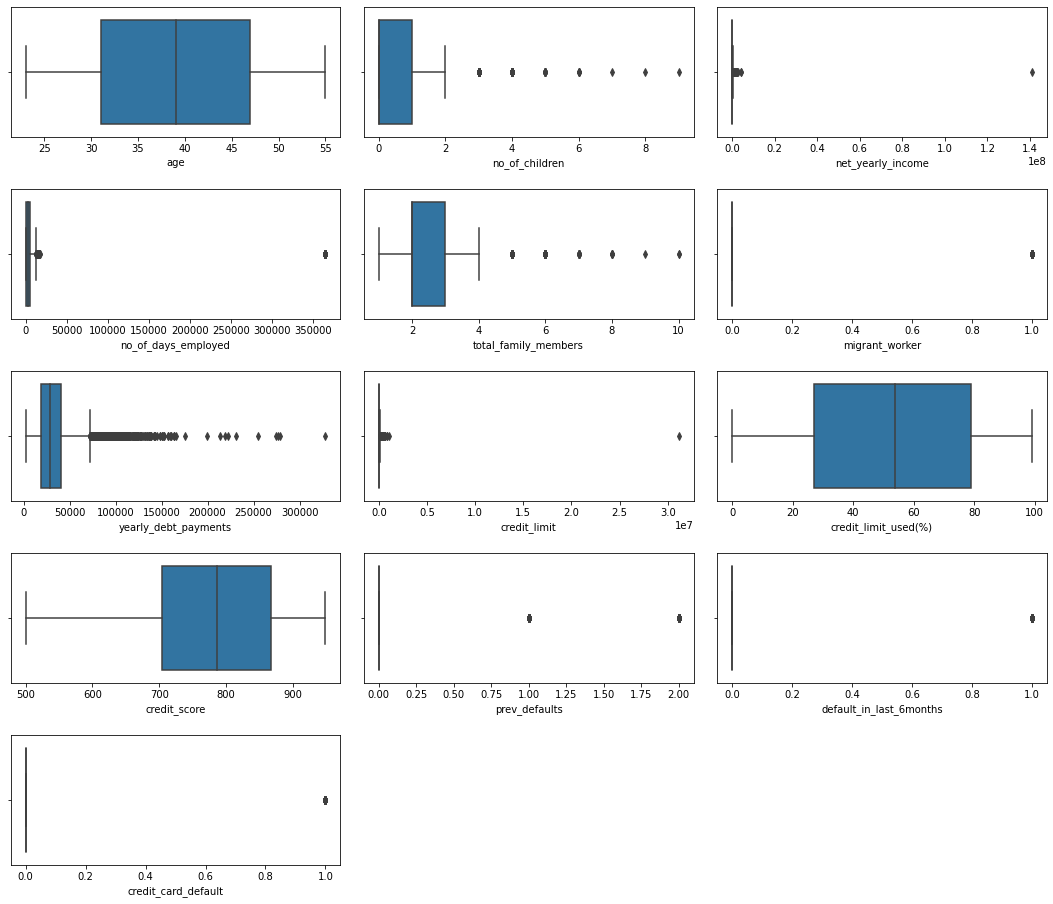

In [655]:
# removing the outliers
plt.figure(figsize=(15,15))
for index,cols in enumerate(num_data):
    plt.subplot(6,3,index+1)
    sns.boxplot(num_data.loc[:,cols])
plt.tight_layout(pad=2)
plt.show()

In [656]:
def checking_outlier(data):
  mean = np.mean(num_data[data]) 
  std = np.std(num_data[data]) 
  threshold = 3.5
  outlier = [] 
  for i in num_data[data]: 
      z = (i-mean)/std 
      if z > threshold: 
          outlier.append(i) 
  if len(outlier)!=0:
    print("\033[1mOutlier in", data ,"are", outlier)
    #print(num_data[data].mean())
    num_data[data] = num_data[data].replace(outlier,num_data[data].mean())
for i in num_data.columns:
  checking_outlier(i)

Outlier in no_of_children are [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 4.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 6.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 6.0, 5.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0,

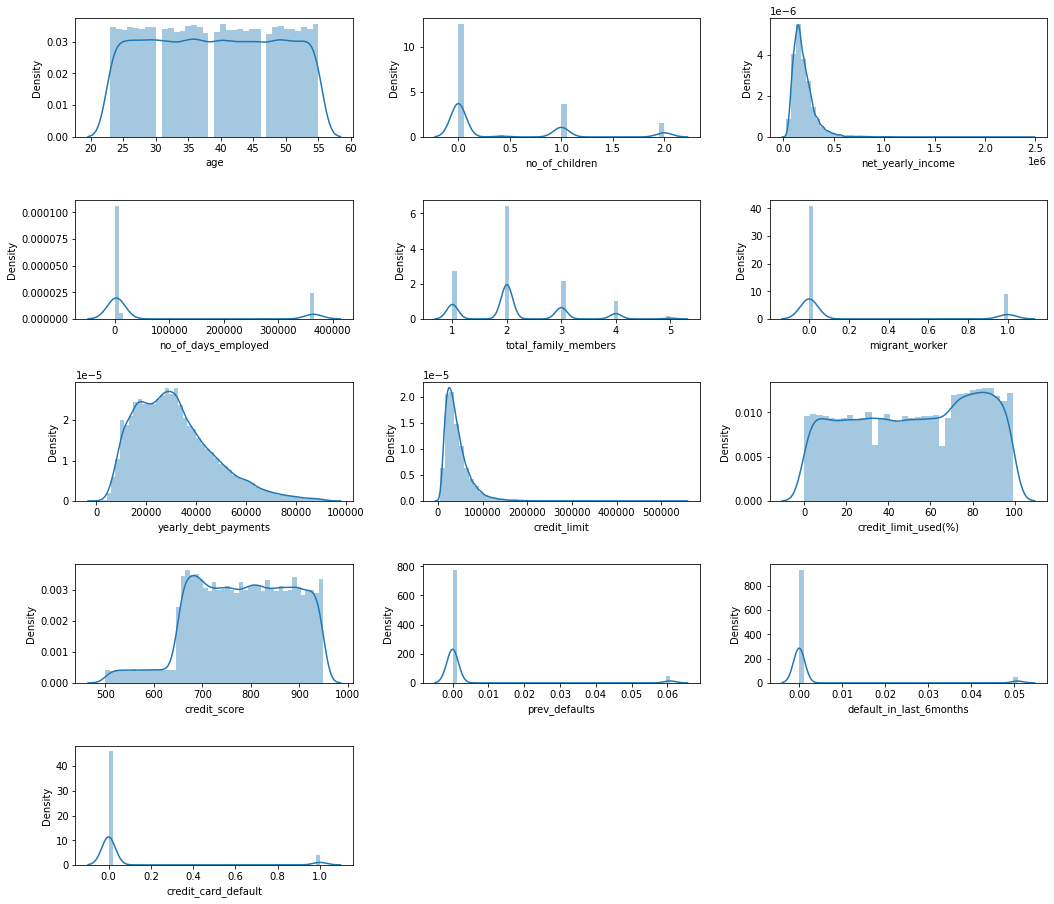

In [657]:
# removing the outliers
plt.figure(figsize=(15,15))
for index,cols in enumerate(num_data):
    plt.subplot(6,3,index+1)
    sns.distplot(num_data.loc[:,cols])
plt.tight_layout(pad=2)
plt.show()

In [658]:
# Defining a funition for checking  skewness
from scipy.stats import skew, kurtosis
def skewedness(data):
    skewed=[]
    for col in data:
        sk=skew(data[col])
        if(sk>=1.96 or sk<=-1.96):
            skewed.append(col)
    return skewed
print(skewedness(num_data))

['net_yearly_income', 'credit_limit', 'prev_defaults', 'default_in_last_6months', 'credit_card_default']


In [659]:
print('Range of skewness & kurtosis: S< |1.96|')
# Checking Kurtosis
print('skewness for net_yearly_income:',skew(num_data.net_yearly_income))
print('kurtosis for net_yearly_income:',kurtosis(num_data.net_yearly_income))

Range of skewness & kurtosis: S< |1.96|
skewness for net_yearly_income: 3.4058541004529372
kurtosis for net_yearly_income: 30.8198564120828


In [660]:
# applying square root to the skewed column
num_data['net_yearly_income'] = np.sqrt(num_data['net_yearly_income'])

In [661]:
num_data['net_yearly_income'].skew()

1.2155217723271519

# handling the skewness of 'credit_limit'

In [662]:
print('Range of skewness & kurtosis: S< |1.96|')
# Checking Kurtosis
print('skewness for credit_limit:',skew(num_data.credit_limit))
print('kurtosis for credit_limit:',kurtosis(num_data.credit_limit))
# applying square root to the skewed column
num_data['credit_limit'] = np.sqrt(num_data['credit_limit'])
num_data['credit_limit'].skew()

Range of skewness & kurtosis: S< |1.96|
skewness for credit_limit: 2.883790663095959
kurtosis for credit_limit: 18.9840490557111


1.0848238939168784

In [663]:
print('Range of skewness & kurtosis: S< |1.96|')
# Checking Kurtosis
print('skewness for prev_defaults:',skew(num_data.prev_defaults))
print('kurtosis for prev_defaults:',kurtosis(num_data.prev_defaults))

Range of skewness & kurtosis: S< |1.96|
skewness for prev_defaults: 3.9312238821169267
kurtosis for prev_defaults: 13.454521211326462


In [664]:
from sklearn.preprocessing import power_transform
num_data['prev_defaults']=power_transform(num_data[['prev_defaults']], method='yeo-johnson')

In [665]:
num_data['prev_defaults'].skew()

3.9313594194908803

In [666]:
print('Range of skewness & kurtosis: S< |1.96|')
# Checking Kurtosis
print('skewness for default_in_last_6months:',skew(num_data.default_in_last_6months))
print('kurtosis for default_in_last_6months:',kurtosis(num_data.default_in_last_6months))

Range of skewness & kurtosis: S< |1.96|
skewness for default_in_last_6months: 4.093729866363007
kurtosis for default_in_last_6months: 14.758624218752473


In [667]:
# applying square root to the skewed column
num_data['default_in_last_6months'] = np.sqrt(num_data['default_in_last_6months'])

In [668]:
num_data['default_in_last_6months'].skew()

4.093871006479268

In [669]:
print('Range of skewness & kurtosis: S< |1.96|')
# Checking Kurtosis
print('skewness for credit_card_default:',skew(num_data.credit_card_default))
print('kurtosis for credit_card_default:',kurtosis(num_data.credit_card_default))

Range of skewness & kurtosis: S< |1.96|
skewness for credit_card_default: 3.0676259021715646
kurtosis for credit_card_default: 7.4103286756739095


In [670]:
# applying square root to the skewed column
num_data['credit_card_default'] = np.exp(num_data['credit_card_default'])

In [671]:
num_data['credit_card_default'].skew()

3.067731665153154

In [672]:
cat_data=train.select_dtypes(include='object')

In [673]:
cat_data

,customer_id,name,gender,owns_car,owns_house,occupation_type
0,CST_115179,ita Bose,F,N,Y,Unknown
1,CST_121920,Alper Jonathan,M,N,Y,Laborers
2,CST_109330,Umesh Desai,M,N,Y,Laborers
3,CST_128288,Rie,F,N,Y,Core staff
4,CST_151355,McCool,M,Y,Y,Core staff
...,...,...,...,...,...,...
45523,CST_130421,Doris,F,N,N,Unknown
45524,CST_136670,Luciana,F,N,Y,Accountants
45525,CST_145435,Jessica,F,N,Y,Core staff
45526,CST_130913,Tessa,M,Y,N,Laborers


In [674]:
cat_data.drop('name',axis=1,inplace=True)

In [675]:
cat_data

,customer_id,gender,owns_car,owns_house,occupation_type
0,CST_115179,F,N,Y,Unknown
1,CST_121920,M,N,Y,Laborers
2,CST_109330,M,N,Y,Laborers
3,CST_128288,F,N,Y,Core staff
4,CST_151355,M,Y,Y,Core staff
...,...,...,...,...,...
45523,CST_130421,F,N,N,Unknown
45524,CST_136670,F,N,Y,Accountants
45525,CST_145435,F,N,Y,Core staff
45526,CST_130913,M,Y,N,Laborers


In [676]:
cat_data['occupation_type'].value_counts()

Unknown                  13676
Laborers                  7751
Sales staff               4501
Core staff                3875
Managers                  3029
Drivers                   2637
High skill tech staff     1597
Accountants               1412
Medicine staff            1227
Security staff             993
Cooking staff              860
Cleaning staff             634
Private service staff      375
Low-skill Laborers         325
Waiters/barmen staff       192
Secretaries                191
Realty agents               94
HR staff                    77
IT staff                    63
Name: occupation_type, dtype: int64

In [677]:
occupation_type=pd.get_dummies(cat_data['occupation_type'],drop_first=True)

In [678]:
occupation_type

,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Unknown,Waiters/barmen staff
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
45524,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45525,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45526,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [679]:
cat_data.drop('occupation_type',axis=1,inplace=True)

In [680]:
from sklearn.preprocessing import LabelEncoder
cat_data['gender'] = LabelEncoder().fit_transform(cat_data['gender'])
cat_data['owns_car'] = LabelEncoder().fit_transform(cat_data['owns_car'])
cat_data['owns_house'] = LabelEncoder().fit_transform(cat_data['owns_house'])

In [681]:
cat_data

,customer_id,gender,owns_car,owns_house
0,CST_115179,0,0,1
1,CST_121920,1,0,1
2,CST_109330,1,0,1
3,CST_128288,0,0,1
4,CST_151355,1,1,1
...,...,...,...,...
45523,CST_130421,0,0,0
45524,CST_136670,0,0,1
45525,CST_145435,0,0,1
45526,CST_130913,1,1,0


In [682]:
cat_data=pd.concat([cat_data,occupation_type],axis=1)

In [683]:
df=pd.concat([num_data,cat_data],axis=1)

In [684]:
df=df.set_index('customer_id')

In [685]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                print(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
correlation(df,0.9)


In [686]:
df.drop('default_in_last_6months',axis=1,inplace=True)

In [687]:
df.columns

Index(['age', 'no_of_children', 'net_yearly_income', 'no_of_days_employed',
       'total_family_members', 'migrant_worker', 'yearly_debt_payments',
       'credit_limit', 'credit_limit_used(%)', 'credit_score', 'prev_defaults',
       'credit_card_default', 'gender', 'owns_car', 'owns_house',
       'Cleaning staff', 'Cooking staff', 'Core staff', 'Drivers', 'HR staff',
       'High skill tech staff', 'IT staff', 'Laborers', 'Low-skill Laborers',
       'Managers', 'Medicine staff', 'Private service staff', 'Realty agents',
       'Sales staff', 'Secretaries', 'Security staff', 'Unknown',
       'Waiters/barmen staff'],
      dtype='object')

In [688]:
y=df['credit_card_default']

In [689]:
x=df.drop('credit_card_default',axis=1)

In [690]:
x

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,gender,owns_car,owns_house,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Unknown,Waiters/barmen staff
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CST_115179,46,0.0,328.533164,612.0,1.0,1.0,33070.28,136.714776,73,544.0,4.170976,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
CST_121920,29,0.0,331.455306,2771.0,2.0,0.0,15329.53,194.281214,52,857.0,-0.239752,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
CST_109330,37,0.0,479.742817,204.0,2.0,0.0,48416.60,203.956760,43,650.0,-0.239752,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
CST_128288,39,0.0,349.751083,11941.0,2.0,0.0,22574.36,180.631559,20,754.0,-0.239752,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CST_151355,46,0.0,622.323067,1459.0,1.0,0.0,38282.95,230.110061,75,927.0,-0.239752,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CST_130421,55,2.0,310.173451,117.0,4.0,0.0,11229.54,172.231908,82,907.0,-0.239752,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
CST_136670,31,0.0,619.254988,966.0,2.0,1.0,43369.91,374.095122,32,679.0,-0.239752,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CST_145435,27,0.0,509.953115,1420.0,2.0,0.0,22707.51,289.761678,46,727.0,-0.239752,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [691]:
y

customer_id
CST_115179    2.718282
CST_121920    1.000000
CST_109330    1.000000
CST_128288    1.000000
CST_151355    1.000000
                ...   
CST_130421    1.000000
CST_136670    1.000000
CST_145435    1.000000
CST_130913    1.000000
CST_160078    1.000000
Name: credit_card_default, Length: 43509, dtype: float64

In [692]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x,y)
scaler = scaler.fit_transform(x)

In [693]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)
print(selection.feature_importances_)

[1.72247102e-02 6.74625117e-03 1.61601899e-02 1.80121845e-02
 9.51784310e-03 5.55641604e-03 1.77287242e-02 1.68090643e-02
 5.03487667e-02 1.69926574e-01 6.26833319e-01 3.91617351e-03
 5.67504290e-03 6.94354326e-03 1.27672187e-03 1.71551765e-03
 2.70838879e-03 2.56768913e-03 1.80730828e-04 1.69237640e-03
 3.01772530e-05 3.87169402e-03 7.69577716e-04 2.33189962e-03
 1.38157801e-03 5.10138652e-04 3.15788851e-04 3.55928780e-03
 3.28288213e-04 1.70227244e-03 2.85074330e-03 8.08326675e-04]


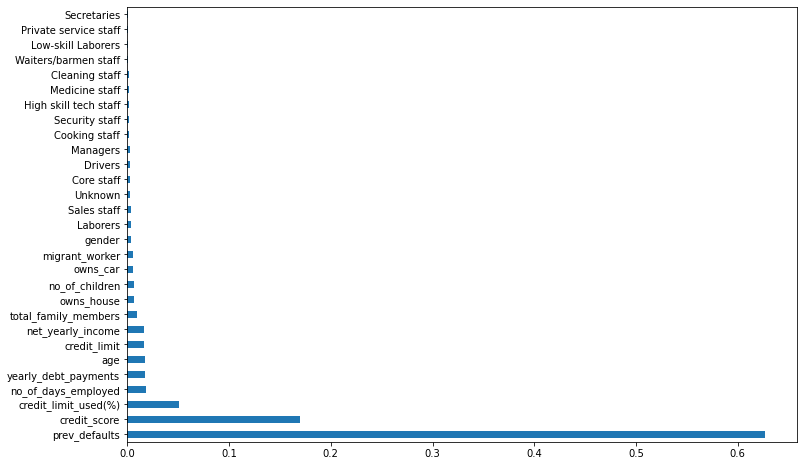

In [694]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(29).plot(kind='barh')
plt.show()

In [695]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=10)

In [696]:
X_train.shape , y_train.shape,X_test.shape,y_test.shape

((34807, 32), (34807,), (8702, 32), (8702,))

In [697]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(max_depth=40,max_features='auto',n_estimators=600,min_samples_leaf= 4,min_samples_split=2,bootstrap=True)
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_train)
print('MAE:', metrics.mean_absolute_error(y_train, y_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print(model_rf.score(X_train, y_train))
print("___________________________________________________________________________________________")
y_pred1 = model_rf.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print(model_rf.score(X_test, y_test))

MAE: 0.02908292548848966
MSE: 0.016073934631426128
RMSE: 0.1267830218579212
0.9275109593786367
___________________________________________________________________________________________
MAE: 0.04443296054250882
MSE: 0.03803841157969076
RMSE: 0.1950343856341511
0.8221107996140314


In [698]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
#
#
#'min_samples_split': min_samples_split,
#'min_samples_leaf': min_samples_leaf,
#'bootstrap': bootstrap

In [699]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [700]:
#rf_random = RandomizedSearchCV(estimator =model_rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1).fit(X_test, y_test)

In [701]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 2000}

In [702]:
rf_random.best_score_

1.0

In [703]:
import xgboost as xgb
model_xr = xgb.XGBRegressor()
model_xr.fit(X_train,y_train)
y_pred = model_xr.predict(X_train)
print('MAE:', metrics.mean_absolute_error(y_train, y_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print(model_xr.score(X_train, y_train))
print("___________________________________________________________________________________________")
y_pred1 = model_xr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print(model_xr.score(X_test, y_test))

[10:04:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 0.05221201206650463
MSE: 0.03910581381786862
RMSE: 0.1977518996567887
0.823643495424403
___________________________________________________________________________________________
MAE: 0.05126672956358812
MSE: 0.038054886852334456
RMSE: 0.19507661790264474
0.8220337518889815


In [704]:
pip install statsmodels

In [705]:
import statsmodels.api as sm
result = sm.OLS(y, x).fit()
  
# printing the summary table
print(result.summary())

                                 OLS Regression Results                                 
Dep. Variable:     credit_card_default   R-squared (uncentered):                   0.943
Model:                             OLS   Adj. R-squared (uncentered):              0.943
Method:                  Least Squares   F-statistic:                          2.264e+04
Date:                 Sat, 25 Dec 2021   Prob (F-statistic):                        0.00
Time:                         10:04:33   Log-Likelihood:                         -8355.0
No. Observations:                43509   AIC:                                  1.677e+04
Df Residuals:                    43477   BIC:                                  1.705e+04
Df Model:                           32                                                  
Covariance Type:             nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------

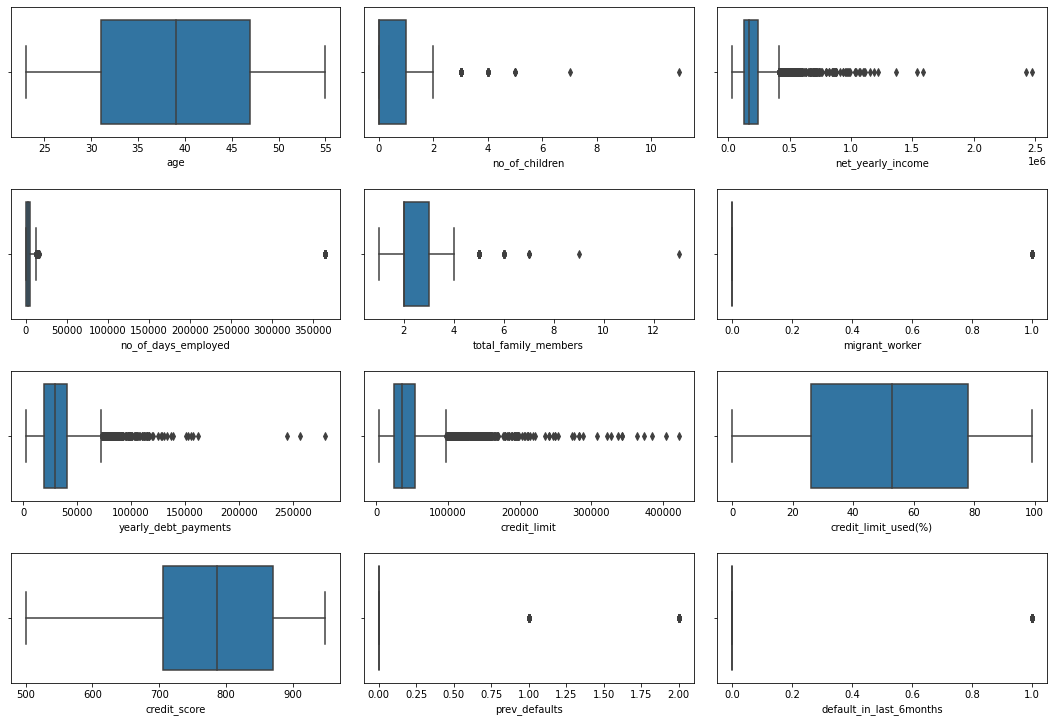

Outlier in no_of_children are [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 7.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 11.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0]
Outlier in net_yearly_income are [711642.86, 667929.2, 932682.85, 1043127.38, 2425652.81, 706207.58, 728015.98, 721143.67, 873214.48, 818268.88, 689434.68, 767279.02, 793295.99, 878147.32, 862321.41, 694

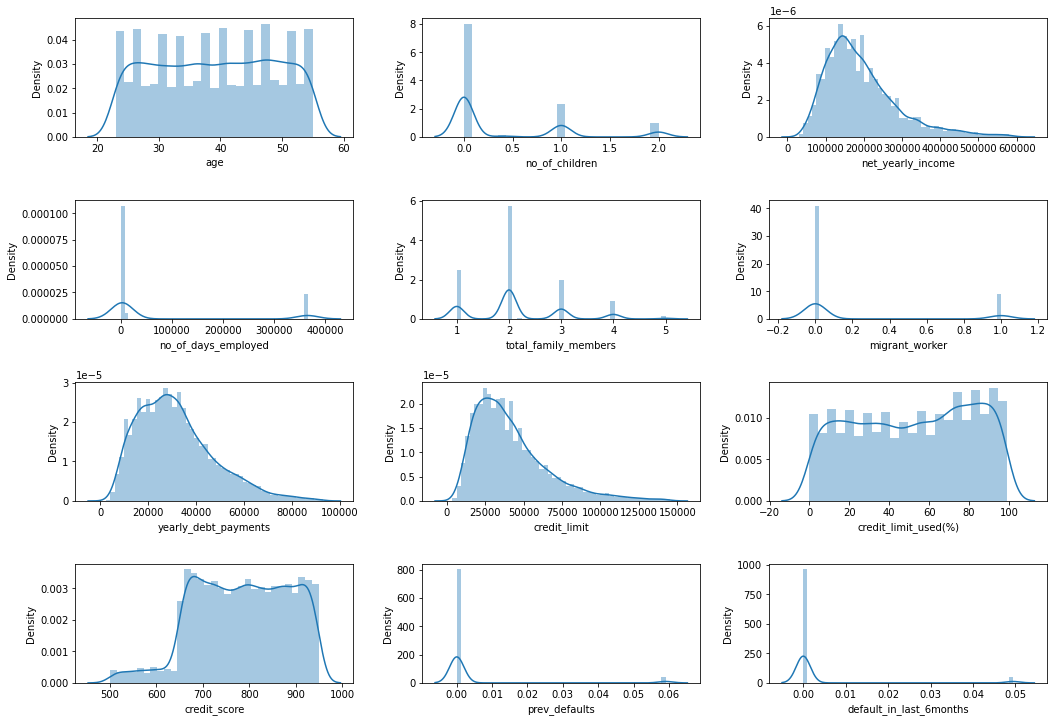

['prev_defaults', 'default_in_last_6months']
Range of skewness & kurtosis: S< |1.96|
skewness for net_yearly_income: 1.2602866819551248
kurtosis for net_yearly_income: 1.8706356784914497
Range of skewness & kurtosis: S< |1.96|
skewness for credit_limit: 1.3200837986553307
kurtosis for credit_limit: 1.981349272057372
Range of skewness & kurtosis: S< |1.96|
skewness for prev_defaults: 4.018488833336881
kurtosis for prev_defaults: 14.148252503653193
Range of skewness & kurtosis: S< |1.96|
skewness for default_in_last_6months: 4.156997755017354
kurtosis for default_in_last_6months: 15.280630335219321
       age  no_of_children  ...  prev_defaults  default_in_last_6months
0       52             0.0  ...        0.00000                  0.00000
1       48             1.0  ...        0.00000                  0.00000
2       50             1.0  ...        0.24307                  0.00000
3       30             1.0  ...        0.00000                  0.00000
4       52             0.0  ...     

In [706]:
test=pd.read_csv("/content/drive/MyDrive/AmExpert/dataset/test.csv")

test.dropna(axis=0,inplace=True)

num_data=test.select_dtypes(include=['int64','float64'])

cat_data=test.select_dtypes(exclude='object')

# removing the outliers
plt.figure(figsize=(15,15))
for index,cols in enumerate(num_data):
    plt.subplot(6,3,index+1)
    sns.boxplot(num_data.loc[:,cols])
plt.tight_layout(pad=2)
plt.show()

def checking_outlier(data):
  mean = np.mean(num_data[data]) 
  std = np.std(num_data[data]) 
  threshold = 3.5
  outlier = [] 
  for i in num_data[data]: 
      z = (i-mean)/std 
      if z > threshold: 
          outlier.append(i) 
  if len(outlier)!=0:
    print("\033[1mOutlier in", data ,"are", outlier)
    #print(num_data[data].mean())
    num_data[data] = num_data[data].replace(outlier,num_data[data].mean())
for i in num_data.columns:
  checking_outlier(i)

# removing the outliers
plt.figure(figsize=(15,15))
for index,cols in enumerate(num_data):
    plt.subplot(6,3,index+1)
    sns.distplot(num_data.loc[:,cols])
plt.tight_layout(pad=2)
plt.show()


# Defining a funition for checking  skewness
from scipy.stats import skew, kurtosis
def skewedness(data):
    skewed=[]
    for col in data:
        sk=skew(data[col])
        if(sk>=1.96 or sk<=-1.96):
            skewed.append(col)
    return skewed
print(skewedness(num_data))

print('Range of skewness & kurtosis: S< |1.96|')
# Checking Kurtosis
print('skewness for net_yearly_income:',skew(num_data.net_yearly_income))
print('kurtosis for net_yearly_income:',kurtosis(num_data.net_yearly_income))

# applying square root to the skewed column
num_data['net_yearly_income'] = np.sqrt(num_data['net_yearly_income'])

print('Range of skewness & kurtosis: S< |1.96|')
# Checking Kurtosis
print('skewness for credit_limit:',skew(num_data.credit_limit))
print('kurtosis for credit_limit:',kurtosis(num_data.credit_limit))
# applying square root to the skewed column
num_data['credit_limit'] = np.sqrt(num_data['credit_limit'])
num_data['credit_limit'].skew()

print('Range of skewness & kurtosis: S< |1.96|')
# Checking Kurtosis
print('skewness for prev_defaults:',skew(num_data.prev_defaults))
print('kurtosis for prev_defaults:',kurtosis(num_data.prev_defaults))

# applying square root to the skewed column
num_data['prev_defaults'] = np.sqrt(num_data['prev_defaults'])

print('Range of skewness & kurtosis: S< |1.96|')
# Checking Kurtosis
print('skewness for default_in_last_6months:',skew(num_data.default_in_last_6months))
print('kurtosis for default_in_last_6months:',kurtosis(num_data.default_in_last_6months))

# applying square root to the skewed column
num_data['default_in_last_6months'] = np.sqrt(num_data['default_in_last_6months'])
print(num_data)
cat_data=test.select_dtypes(include='object')

cat_data.drop('name',axis=1,inplace=True)

occupation_type=pd.get_dummies(cat_data['occupation_type'],drop_first=True)

cat_data.drop('occupation_type',axis=1,inplace=True)

from sklearn.preprocessing import LabelEncoder
cat_data['gender'] = LabelEncoder().fit_transform(cat_data['gender'])
cat_data['owns_car'] = LabelEncoder().fit_transform(cat_data['owns_car'])
cat_data['owns_house'] = LabelEncoder().fit_transform(cat_data['owns_house'])

cat_data=pd.concat([cat_data,occupation_type],axis=1)

df_test=pd.concat([num_data,cat_data],axis=1)
print(df_test)
df_test=df_test.set_index('customer_id')

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                print(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
    df_test=pd.DataFrame(dataset)
correlation(df_test,0.9)


In [707]:
df_test.head()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,gender,owns_car,owns_house,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Unknown,Waiters/barmen staff
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CST_142525,52,0.0,482.328239,998.0,2.0,0.0,14406.73,162.863133,4,779.0,0.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
CST_129215,48,1.0,533.288655,1338.0,3.0,0.0,57479.99,262.676074,70,806.0,0.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
CST_138443,50,1.0,386.547901,1210.0,3.0,0.0,21611.01,158.706648,71,528.0,0.24307,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
CST_123812,30,1.0,400.546552,503.0,2.0,1.0,28990.76,170.819759,9,815.0,0.00000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
CST_144450,52,0.0,483.198065,157.0,2.0,1.0,54213.72,286.935219,82,613.0,0.24307,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [712]:
import pickle
# open a file, where you ant to store the data
file = open('model.pkl', 'wb')

# dump information to that file
pickle.dump(model_xr, file)

In [713]:
models = open('model.pkl','rb')
forest = pickle.load(models)

[10:05:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [714]:
y_prediction = forest.predict(df_test)

In [715]:
y_prediction

array([0.99597305, 0.9952438 , 2.7288322 , ..., 1.0180626 , 0.9824419 ,
       0.99968475], dtype=float32)